In [2]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns;
%matplotlib inline
import matplotlib.dates as md;
import datetime as dt;
import warnings
warnings.filterwarnings('ignore');

In [3]:
# Reading the Data file
df=pd.read_csv('/content/drive/MyDrive/Data Analyst/PowerBI_Projects/Unified Mentor Projects/Heart Disease data/Heart Disease data/Heart Disease data.csv')
print(df.to_string())


      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  target
0      52    1   0       125   212    0        1      168      0      1.0      2   2     3       0
1      53    1   0       140   203    1        0      155      1      3.1      0   0     3       0
2      70    1   0       145   174    0        1      125      1      2.6      0   0     3       0
3      61    1   0       148   203    0        1      161      0      0.0      2   1     3       0
4      62    0   0       138   294    1        1      106      0      1.9      1   3     2       0
5      58    0   0       100   248    0        0      122      0      1.0      1   0     2       1
6      58    1   0       114   318    0        2      140      0      4.4      0   3     1       0
7      55    1   0       160   289    0        0      145      1      0.8      1   1     3       0
8      46    1   0       120   249    0        0      144      0      0.8      2   0     3       0
9      54 

In [4]:
#Data file info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
print(df.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [ ]:
#Column Details:
# Age: Age of the patient,
# Sex: Gender of the patient (0 = Female, 1 = Male),
# Chest pain type: Type of chest pain (values 1-4),
# BP: Blood Pressure,
# Cholesterol: Cholesterol level,
# FBS over 120: Fasting blood sugar > 120 mg/dl (0 = False, 1 = True),
# EKG results: Results of electrocardiographic test (values 0-2),
# Max HR: Maximum heart rate achieved,
# Exercise angina: Exercise-induced angina (0 = No, 1 = Yes),
# ST depression: ST depression induced by exercise relative to rest,
# Slope of ST: Slope of the peak exercise ST segment (values 1-3),
# Number of vessels fluro: Number of major vessels colored by fluoroscopy (values 0-3),
# Thallium: Thallium stress test result (values 0 - 4)
# Target: 1-Presence , 0- absence of heart disease

In [12]:
df[['age','trestbps','fbs','chol','thalach']].describe()

,age,trestbps,fbs,chol,thalach
count,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000
mean,54.434146,131.611707,0.149268,246.00000,149.114146
std,9.072290,17.516718,0.356527,51.59251,23.005724
min,29.000000,94.000000,0.000000,126.00000,71.000000
25%,48.000000,120.000000,0.000000,211.00000,132.000000
50%,56.000000,130.000000,0.000000,240.00000,152.000000
75%,61.000000,140.000000,0.000000,275.00000,166.000000
max,77.000000,200.000000,1.000000,564.00000,202.000000


In [11]:
#Checking for NULL values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [18]:
# Gives the Total patients with Heart Disease
df['Total_Heart_patients']= df['target'].where(df['target']==1)
Total_Heart_patients=df['Total_Heart_patients'].sum()
print(Total_Heart_patients)

526.0


In [ ]:
#Checking correlation between the columns
# The Result of the corr() method is a table with a lot of numbers that represents how well the relationship is between two columns.
# The number varies from -1 to 1.
# 1 means that there is a 1 to 1 relationship (a perfect correlation), and for this data set, each time a value went up in the first column, the other one went up as well.
# 0.9 is also a good relationship, and if you increase one value, the other will probably increase as well.
# -0.9 would be just as good relationship as 0.9, but if you increase one value, the other will probably go down.
# 0.2 means NOT a good relationship, meaning that if one value goes up does not mean that the other will.

In [19]:
df[['age','trestbps','fbs','chol','thalach','target']].corr()


,age,trestbps,fbs,chol,thalach,target
age,1.000000,0.271121,0.121243,0.219823,-0.390227,-0.229324
trestbps,0.271121,1.000000,0.181767,0.127977,-0.039264,-0.138772
fbs,0.121243,0.181767,1.000000,0.026917,-0.008866,-0.041164
chol,0.219823,0.127977,0.026917,1.000000,-0.021772,-0.099966
thalach,-0.390227,-0.039264,-0.008866,-0.021772,1.000000,0.422895
target,-0.229324,-0.138772,-0.041164,-0.099966,0.422895,1.000000


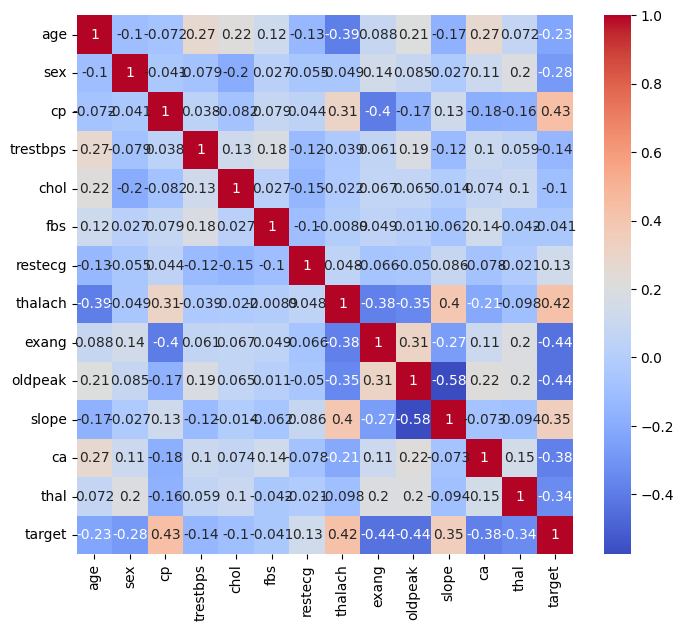

In [23]:
plt.figure(figsize=(8, 7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [27]:
# GIves the total heart patients with Daibetics
df['Patients_with_diabetics'] = (df['fbs']==1) & (df['target']==1)
Patients_with_diabetics=df['Patients_with_diabetics'].sum()
print(Patients_with_diabetics)

71


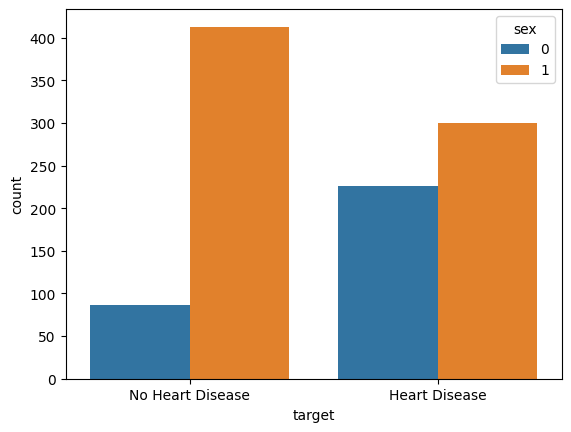

In [54]:
# Plot distribution of target variable
sns.countplot(x='target', hue='sex',data=df)
xlabels = ['No Heart Disease', 'Heart Disease']
plt.xticks(np.arange(2), xlabels)
plt.show()

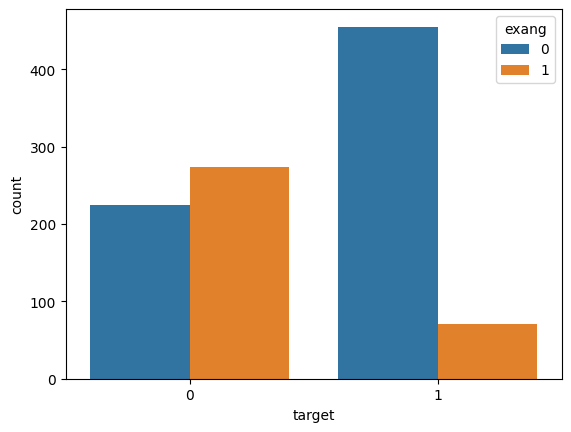

In [57]:
# Plot distribution of Exercise Angina variable
sns.countplot(x='target', hue='exang',data=df)
plt.show()